# Foundations of Data Mining: Assignment 1

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100
InteractiveShell.ast_node_interactivity = "all"

## Handwritten digit recognition (5 points, 1+2+2)
The [MNIST dataset](https://www.openml.org/d/554) contains 70,000 images of handwritten digits (0-9) represented by 28 by 28 pixel values. We can easily download it from OpenML and visualize one of the examples:

In [2]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = '11e82c8d91c5abece86f424369c71590'

Class label: 5


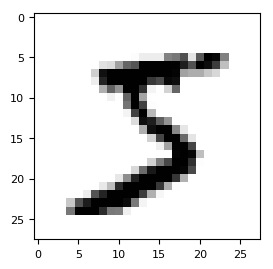

In [3]:
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute); # Get the predictors X and the labels y
plt.imshow(X[0].reshape(28, 28), cmap=plt.cm.gray_r) # Take the first example, reshape to a 28x28 image and plot
print("Class label:",y[0]) # Print the correct class label

- Evaluate a k-Nearest Neighbor classifier with its default settings.
    - Use the first 60,000 examples as the training set and the last 10,000 as the test set
    - What is the predictive accuracy?
    - Find a few misclassifications, and plot them together with the true labels (as above). Are these images really hard to classify?
- Optimize the value for the number of neighbors $k$ (keep $k$ < 50) on a stratified subsample (e.g. 10%) of the data
    - Use 10-fold crossvalidation and plot $k$ against the misclassification rate. Which value of $k$ should you pick?
    - Do the same but with 100 bootstrapping repeats. Are the results different? Explain.
- Compare kNN against the linear classification models that we have covered in the course (logistic regression and linear SVMs).
    - First use the default hyperparameter settings.
    - Next, optimize for the degree of regularization ($C$) and choice of penalty (L1/L2). Again, plot the accuracy while increasing the degree of regularization for different penalties. Interpret the results. 
    - Report is the optimal performance. Can you get better results than kNN?
    
Report all results clearly and interpret the results.  
Note: while prototyping/bugfixing, you can speed up experiments by taking a smaller sample of the data, but report your results as indicated above.

## Evaluate the k-Neareast Neighbor classifier with default settings. 

**Smaller data sets**

First we need to choose the proportion of data that we will be using as training and as test. Since we want to have 60,000 training examples and 10,000 test examples we need to choose the appropriate proportions. In this case the proportions would be given by :

$x_{train}=\frac{60000}{70000}$ and $x_{train}=\frac{10000}{70000}$

In [4]:
X=X[1:1000]; y=y[1:1000];

In [5]:
percentage = 0.1 #Percentage of test data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=percentage , random_state=0)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### - Preddictive accuracy

The predictive accuracy is obtained from evaluating the model created by Kneighbors on the test data that we have. 

In [6]:
print("Test set accuracy: %.2f" % clf.score(X_test, y_test))

Test set accuracy: 0.82


### - Few misclassifications

To identify some of the missclassifications that we have from evaluating our test data we need to compare to the true labels of these data. 

In [7]:
# First we obtain the prediction labels for our test data
labeled_test = clf.predict(X_test)

# We get the indexes of the data which have been incorrectly labeled
index_of_incorrect = [labeled_test!=y_test]

# We extract the values that were given by our model incorrectly
incorrect_values = np.array([labeled_test[index_of_incorrect]])
incorrect_values=np.transpose(incorrect_values)

# We extract the data values of the incorrectly labeled data
incorrect_images = np.array(X_test[index_of_incorrect])

# We extract the real values that our algorithm should have identified (this are the real labels)
y_test_incorrect = np.array(y_test[index_of_incorrect])


Now we plot the images of the first ten incorrectly labeled samples. We also print the values of the correct class label and the predicted label.  

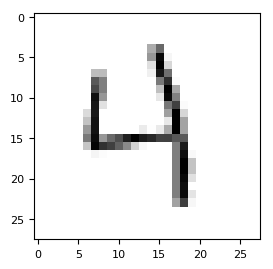

Real class label: 4 Algorithm labels [9]


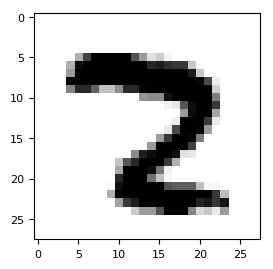

Real class label: 2 Algorithm labels [7]


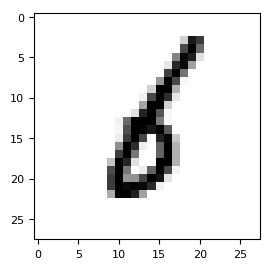

Real class label: 6 Algorithm labels [1]


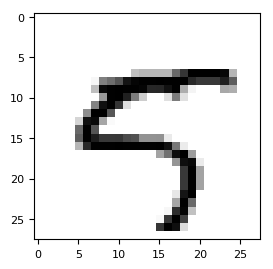

Real class label: 5 Algorithm labels [9]


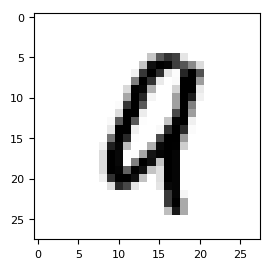

Real class label: 9 Algorithm labels [6]


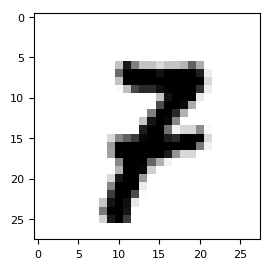

Real class label: 7 Algorithm labels [1]


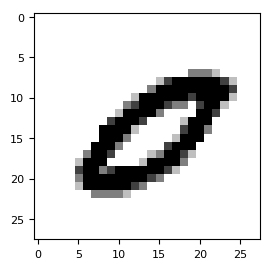

Real class label: 0 Algorithm labels [5]


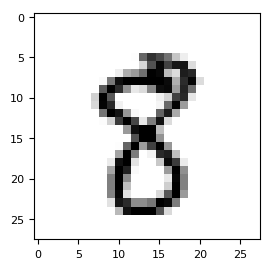

Real class label: 8 Algorithm labels [5]


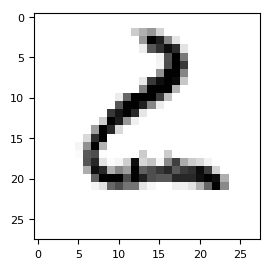

Real class label: 2 Algorithm labels [5]


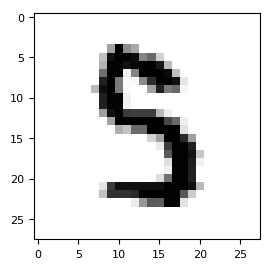

Real class label: 5 Algorithm labels [3]


In [8]:
for i in range(10):
    plt.imshow(incorrect_images[i].reshape(28, 28), cmap=plt.cm.gray_r) # Take the first example, reshape to a 28x28 image and plot
    plt.show()
    print("Real class label:",y_test_incorrect[i],"Algorithm labels",incorrect_values[i]) # Print the correct class label
    


One usefull way of visualizing the amount of errors commited by our algorithm is by using the confusion matrix.

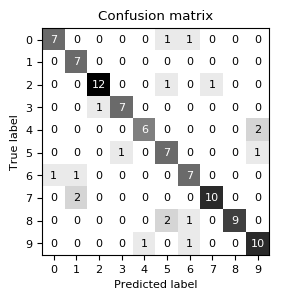

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
digits = load_digits()
pred = labeled_test
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")    
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

From the confusion matrix we can already identify the number of correctly and incorrectly labeled data. Some extra information about which errors are commited is presented.

## Cross validation

Is it already stratified???

In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.894  0.874  0.816  0.902  0.871  0.86   0.798  0.885  0.854  0.874]


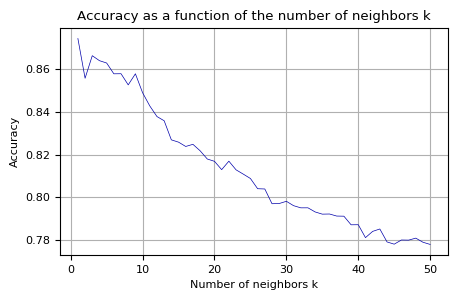

In [58]:
scores = [];
max_neighbors = 50;
for k in range (max_neighbors):
    clf=KNeighborsClassifier(n_neighbors=k+1)
    scores.append(np.mean(cross_val_score(clf,X,y,cv=10)))
    
plt.plot(np.array(range(max_neighbors))+1,scores)
plt.title("Accuracy as a function of the number of neighbors k")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors k")
plt.grid()



In [ ]:
scores = [];
max_neighbors = 50;
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
for k in range (max_neighbors):
    clf=KNeighborsClassifier(n_neighbors=k+1)
    scores.append(np.mean(cross_val_score(clf,X,y,cv=10)))
    
plt.plot(np.array(range(max_neighbors))+1,scores)
plt.title("Accuracy as a function of the number of neighbors k")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors k")
plt.grid()

### Linear models

- Compare kNN against the linear classification models that we have covered in the course (logistic regression and linear SVMs).
    - First use the default hyperparameter settings.
    - Next, optimize for the degree of regularization ($C$) and choice of penalty (L1/L2). Again, plot the accuracy while increasing the degree of regularization for different penalties. Interpret the results. 
    - Report is the optimal performance. Can you get better results than kNN?

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
percentage = 0.1 #Percentage of test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=percentage , random_state=0)

Firs we will compare the kNN model against the default hyperparameter settings of the logistic regression and the linear SVMs

In [56]:
clf = KNeighborsClassifier().fit(X_train,y_train)
logreg = LogisticRegression().fit(X_train,y_train)
linear_svc = LinearSVC().fit(X_train,y_train)
print("The score for the kNeighbors is: ",clf.score(X_test,y_test))
print("The score for the logistic regression is: ",logreg.score(X_test,y_test))
print("The score for the linear SVM is: ",linear_svc.score(X_test,y_test))

The score for the kNeighbors is:  0.82
The score for the logistic regression is:  0.87
The score for the linear SVM is:  0.86


We notice that the method of the kNeighbors has an efficiency of _____ that is different to the linear methods of logistic regression and the support vector machine.

Now, we will optimize the linear classification models of logistic regression and SVM. We will check different orders of magnitud of the degree of regularization $C$. We will be using the values $C=[0.001, 0.01, 0.1, 1, 10, 100]$. We will be choosing between two types of penalties: L1 and L2 which add an extra term to the least squares cost function.

**L1 regularization**

$\lambda \sum_{i=1}^{k}|w_i|$


**L2 regularization**

$\lambda \sum_{i=1}^{k} w_i^2$

We will plot the accuracy of the model when applied to the test data and compare it with the kNeighbors method.

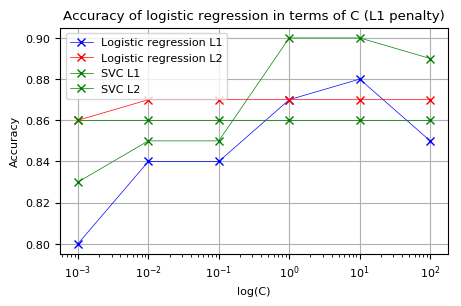

In [57]:
logistic = [];
svc = [];
C_values = [0.001, 0.01, 0.1, 1, 10, 100];
penalty_values = ['l1','l2']; 
for penalty in penalty_values:
    for C in C_values: 
        logreg = LogisticRegression(C=C,penalty=penalty).fit(X_train,y_train)
        logistic.append(logreg.score(X_test,y_test))
        linear_svc = LinearSVC(C=C,penalty=penalty,dual=False).fit(X_train,y_train)
        svc.append(linear_svc.score(X_test,y_test))
     

    
plt.plot(C_values,logistic[:6],'bx-',label = 'Logistic regression L1')
plt.plot(C_values,logistic[6:],'rx-', label = 'Logistic regression L2')
plt.plot(C_values,svc[:6],'gx-', label = 'SVC L1')
plt.plot(C_values,svc[6:],'gx-', label = 'SVC L2')
plt.title("Accuracy of logistic regression in terms of C (L1 penalty)")
plt.ylabel("Accuracy");
plt.xlabel("log(C)");
plt.legend();
plt.xscale('log');
plt.grid()    

**Still missing and analysis whether we can get better results than with kNeighbors**

## Model selection (4 points (2+2))
Study how RandomForest hyperparameters interact on the Ionosphere dataset (OpenML ID 59).

- Optimize a RandomForest, varying both $n\_estimators$ and $max\_features$ at the same time. Use a nested cross-validation and a grid search (or random search) over the possible values, and measure the AUC. Explore how fine-grained this grid/random search can be, given your computational resources. What is the optimal AUC performance you find?
- Again, vary both hyperparameters, but this time use a grid search and visualize the results as a plot (heatmap) $n\_estimators \times max\_features \rightarrow AUC$ with AUC visualized as the color of the data point. Try to make the grid as fine as possible. Interpret the results. Can you explain your observations? What did you learn about tuning RandomForests?

Hint: Running this experiment can take a while, so start early and use a feasible grid/random search. Start with a coarse grid or few random search iterations.
Hint: Use a log scale (1,2,4,8,16,...) for $n\_estimators$. Vary $max\_features$ linearly between 1 and the total number of features. Note that, if you give $max\_features$ a float value, it will use it as [the percentage of the total number of features](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).


In [6]:
ionosphere = oml.datasets.get_dataset(59) # Download Ionosphere data
X, y = ionosphere.get_data(target=ionosphere.default_target_attribute); # Get the predictors X and the labels y

TypeError: unsupported operand type(s) for ** or pow(): 'int' and 'range'

## Decision tree heuristics (1 point)
Consider the toy training set created below. It predicts whether your date agrees to go out with you depending on the weather.

Learn a decision tree:

- Implement functions to calculate entropy and information gain
- What is the class entropy for the entire dataset? What is the information gain when you split the data using the *Water* feature?
- Implement a basic decision tree:
    - Select a feature to split on according to its information gain. If multiple features are equally good, select the leftmost one.
    - Split the data and repeat until the tree is complete.
    - Print out the results (nodes and splits).
- Now train a scikit-learn decision tree on the same data. Do you get the same result? Explain.

In [340]:
df = pd.DataFrame({"Sky":['sunny','sunny','rainy','sunny','sunny'],
                   "AirTemp":['warm','warm','warm','cold','warm'],
                   "Humidity":['normal','high','high','high','normal'],
                   "Wind":['strong','strong','strong','strong','weak'],
                   "Water":['warm','warm','cool','warm','warm'],
                   "Forecast":['same','same','change','change','same'],
                   "Date?":['yes','yes','no','yes','no']
                   });
df = df[['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast', 'Date?']] # Fix column ordering
df # print

,Sky,AirTemp,Humidity,Wind,Water,Forecast,Date?
0,sunny,warm,normal,strong,warm,same,yes
1,sunny,warm,high,strong,warm,same,yes
2,rainy,warm,high,strong,cool,change,no
3,sunny,cold,high,strong,warm,change,yes
4,sunny,warm,normal,weak,warm,same,no


In [341]:
df.columns
df.values[:,-1]

Index(['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast', 'Date?'], dtype='object')

array(['yes', 'yes', 'no', 'yes', 'no'], dtype=object)

First we will complete the functions for the entropy and the information gain. These functions are given by the following formula:

** Entropy ** 

$$ E(X) = -\sum_{k=1}^K \hat{p}_k \log_{2}\hat{p}_k $$

** Information gain ** (After doing a partition)

$$ G(X,X_i) = E(X) - \sum_{v=1}^V \frac{|X_{i=v}|}{|X_{i}|} E(X_{i=v}) $$

where $\hat{p}_k$ = the relative frequency of class $k$ in the leaf node,  $X$ = the training set, containing $i$ features (variables) $X_i$, $v$ a specific value for $X_i$, $X_{i=v}$ is the set of examples having value $v$ for feature $X_i$: $\{x \in X | X_i = v\}$

In [342]:
# Complete these functions first
def entropy(pos, neg):
    p_1 = pos/(pos+neg)
    p_2 = neg/(pos+neg)
    if p_1 == 0:
        return -p_2*np.log(p_2)
    elif p_2 == 0:
        return -p_1*np.log(p_1)
    else :
        return -(p_1*np.log2(p_1)+p_2*np.log(p_2))

def info_gain(pos1,neg1,pos2,neg2):
    total_entropy = entropy(pos1+pos2,neg1+neg2)
    total_values = pos1+neg1+pos2+neg2
    entropy1 = entropy(pos1,neg1)
    entropy2 = entropy(pos2,neg2)
    total1 = pos1+neg1
    total2 = pos2+neg2
    weighted_sum = total1*entropy1/total_values + total2*entropy2/total_values
    return total_entropy-weighted_sum

The total entropy is given by the values of the date? feature. These will give the positive and negative values as follows:

In [343]:
pos = sum(df.values[:,-1]=='yes')
neg = sum(df.values[:,-1]=='no')
entropy(pos,neg)

0.80869564924938575

The entropy of the entire set is about 0.81
Now we will see how it affects the information gain when we do a partition on the water feature. 

In [363]:
pos1 = sum([a and b for a, b in zip(df.values[:,-1]=='yes',df.values[:,-3]=='cool')])
pos2 = sum([a and b for a, b in zip(df.values[:,-1]=='yes',df.values[:,-3]=='warm')])
neg1 = sum([a and b for a, b in zip(df.values[:,-1]=='no',df.values[:,-3]=='cool')])
neg2 = sum([a and b for a, b in zip(df.values[:,-1]=='no',df.values[:,-3]=='warm')])
print("\nThe info gain after partitioning the water feature is: ",info_gain(pos1,neg1,pos2,neg2))


The info gain after partitioning the water feature is:  0.282414277458


We can see that after doing the partition the entropy measure decreases which means that the predictability of the data has increased. 

- Implement a basic decision tree:
    - Select a feature to split on according to its information gain. If multiple features are equally good, select the leftmost one.
    - Split the data and repeat until the tree is complete.
    - Print out the results (nodes and splits).
- Now train a scikit-learn decision tree on the same data. Do you get the same result? Explain.

In [360]:
info_gain_data=[];
for i in range(len(df.columns)-1):
    pos1 = sum([a and b for a, b in zip(df.values[:,-1]==df.values[:,-1][0],df.values[:,i]==df.values[:,i][0])])
    pos2 = sum([a and b for a, b in zip(df.values[:,-1]==df.values[:,-1][0],df.values[:,i]!=df.values[:,i][0])])
    neg1 = sum([a and b for a, b in zip(df.values[:,-1]!=df.values[:,-1][0],df.values[:,i]==df.values[:,i][0])])
    neg2 = sum([a and b for a, b in zip(df.values[:,-1]!=df.values[:,-1][0],df.values[:,i]!=df.values[:,i][0])])
    info_gain_data.append([i,info_gain(pos1,neg1,pos2,neg2)])
    
print(min(info_gain_data, key = lambda t: t[1]))

[2, 0.016358755115312151]


In [359]:
min(info_gain_data, key = lambda t: t[1])

[2, 0.016358755115312151]

## Random Forests (4 points (1+1+2))
Study the effect of the number of trees in a RandomForest on the EEG-eye-state dataset (http://www.openml.org/d/1471). This dataset measures brain activity using 15 sensors, and you need to predict whether the person's eyes are open or closed. 

* Train a RandomForest classifier on this dataset with an increasing number of trees (on a log scale as above). Plot the Out-Of-Bag error against the number of trees.
    - The Out-Of-Bag error is the test error obtained when using bootstrapping, and using the non-drawn data points as the test set. This is what a RandomForest does internally, so you can retrieve it from the classifier. The code below hints on how to do this.
* Construct the same plot, but now use 10-fold Cross-validation and error rate instead of the OOB error. Compare the two. What do you learn from this?
* Compare the performance of the RandomForest ensemble with that of a single full decision tree. Compute the AUC as well as the bias and variance. Does the bias and variance increase/decrease for the ensemble? Does the number of trees affect the result?

Hint: Error rate = 1 - accuracy  
Hint: We discussed bias-variance decomposition in class. It is not included in scikit-learn, so you'll need to implement it yourself.

In [289]:
eeg = oml.datasets.get_dataset(1471) # Download Ionosphere data
X, y = eeg.get_data(target=eeg.default_target_attribute);

# Out of bag errors can be retrieved from the RandomForest classifier. You'll need to loop over the number of trees.
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(oob_score=True,)
clf.fit(X, y)
(1 - clf.oob_score)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

0

First we will obtain the Out-of-bag error from the Random forest with different numbers of trees from 1 to 100. We will retrieve the OOB error from the classifier and plot it against the number of trees used. 

In [254]:
x=2**np.linspace(1,10,10)
x.astype(int)

array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=True, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=1, oob_score=True, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=8, n_jobs=1, oob_score=True, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=16, n_jobs=1, oob_score=True, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=1, oob_score=True, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=64, n_jobs=1, oob_score=True, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=128, n_jobs=1, oob_score=True, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=256, n_jobs=1, oob_score=True, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=512, n_jobs=1, oob_score=True, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1024, n_jobs=1, oob_score=True, random_state=2,
            verbose=0, warm_start=False)

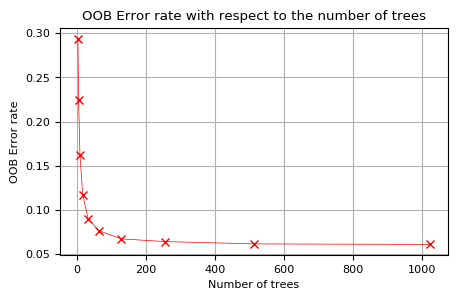

In [256]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn import ensemble
trees = 2**np.linspace(1,10,10)
trees = trees.astype(int)
oob = [];
for i in trees:
    forest = RandomForestClassifier(n_estimators=i, random_state=2,oob_score=True)
    forest.fit(X,y)
    oob.append(1 - forest.oob_score_)
    


Now we will plot our results.

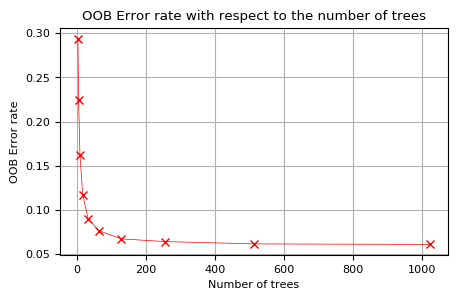

In [257]:
plt.plot(trees, oob, '-rx')
plt.xlabel("Number of trees")
plt.ylabel("OOB Error rate")
plt.title("OOB Error rate with respect to the number of trees")
plt.grid()
plt.show()

From the plot we can notice that the OOB error decreases with the number of trees. Now we will obtain the error rate from using 10-fold cross validation. The error rate is given by the average of the accuracy of our 10-fold validations. We get it from 

In [258]:
trees = 2**np.linspace(1,10,10)
trees = trees.astype(int)
error = [];
for i in trees: #range(min_estimators,max_estimators+1):
    random_forest = RandomForestClassifier(n_estimators=i, random_state=2)
    scores = cross_val_score(random_forest, X, y, cv=10)
    error.append(1-np.mean(scores))

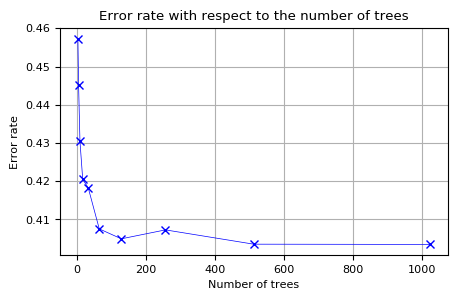

In [262]:
plt.plot(trees,error,'-bx')
plt.xlabel("Number of trees")
plt.ylabel("Error rate")
plt.title("Error rate with respect to the number of trees")
plt.legend(loc="best")
plt.grid()
plt.show()

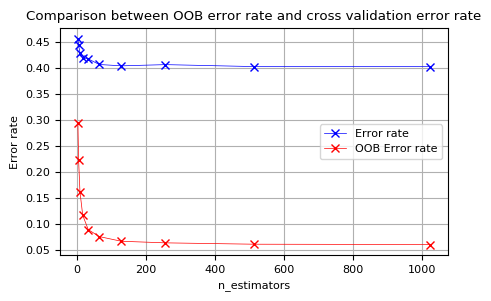

In [264]:
plt.plot(trees,error,'-bx',label="Error rate")
plt.plot(trees,oob,'-rx',label="OOB Error rate")
plt.xlabel("n_estimators")
plt.ylabel("Error rate")
plt.grid()
plt.title("Comparison between OOB error rate and cross validation error rate")
plt.legend(loc="best")
plt.show()

* Compare the performance of the RandomForest ensemble with that of a single full decision tree. Compute the AUC as well as the bias and variance. Does the bias and variance increase/decrease for the ensemble? Does the number of trees affect the result?

In [281]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()
random_forest.fit(X_train,y_train)
decision_tree.fit(X_train,y_train)

print("\n The performance of the random forest is: ", random_forest.score(X_test,y_test))
print("\n The performance of the decision tree is: ", decision_tree.score(X_test,y_test))

confusion_random = confusion_matrix(y_test, random_forest.predict(X_test))
confusion_tree = confusion_matrix(y_test, decision_tree.predict(X_test))
print("\n Confusion matrix for random forest:\n{}".format(confusion_random))
print("\n Confusion matrix for decision tree:\n{}".format(confusion_tree))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


 The performance of the random forest is:  0.891855807744

 The performance of the decision tree is:  0.833377837116

 Confusion matrix for random forest:
[[1924  103]
 [ 302 1416]]

 Confusion matrix for decision tree:
[[1738  289]
 [ 335 1383]]


In [ ]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(RandomForestClassifier, X,y, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

In [324]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit
kfold = KFold(n_splits=5)
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
splitted =shuffle_split.split(X,y)
for train, test in splitted:
     print("%s %s" % (train, test))
print(splitted)
print("Cross-validation scores:\n{}".format(cross_val_score(DecisionTreeClassifier(random_state=0), X, y, cv=kfold)))

[ 5382  9114 12630 ...,  7148   248 12493] [12751  2492  8207 ...,  5328  4718  7411]
[ 8367  8964   135 ..., 12503 12316 14213] [ 7827 13656  9492 ..., 10592 10526  3807]
[   13 13311  4365 ...,  8708  5409   130] [ 3860  6264  8851 ..., 10320 10582 14863]
[ 6544  4576 10818 ...,   783  9405  2623] [13152   806  3754 ...,   647  9509 11037]
[12138  9152  2129 ..., 10408  6062  8082] [ 5310  3765 12441 ...,  3435  3401  3819]
[ 7854 10898 11022 ..., 11217 11490 12311] [  625 13355  7650 ...,  9989  8173  3775]
[14391  3772  4009 ...,  2236  7320 10346] [12433 11524  1312 ..., 11298 14377  7997]
[6366 3605  634 ..., 2128 6309 2310] [13879 14384  9462 ..., 13666 11871  8387]
[ 5733 13549 13473 ...,  7952  1766 11756] [13151  3171 11010 ...,  5587 12377  2272]
[ 467 3449 6393 ..., 8582 2363 5476] [ 7084  6015  2936 ..., 13576  1487 10339]
<generator object BaseShuffleSplit.split at 0x000001637FA6F570>
Cross-validation scores:
[ 0.516  0.48   0.274  0.456  0.526]


In [329]:
from sklearn.metrics import roc_auc_score

# First we split the data to calculate the area under the curve
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# We define both of our classifiers
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

random_forest_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])
decision_tree_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])
print("AUC for Random Forest: {:.3f}".format(random_forest_auc))
print("AUC for Decision Tree: {:.3f}".format(decision_tree_auc))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

AUC for Random Forest: 0.960
AUC for Decision Tree: 0.829


We will also analyze how the area under the curve changes with respect to the number of trees of the random forest. 

In [337]:
trees = 2**np.linspace(1,10,10)
trees = trees.astype(int)
AUC_random_forest = []
for i in trees:
    random_forest = RandomForestClassifier(n_estimators=i, random_state=2)
    random_forest.fit(X_train, y_train)
    random_forest_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])
    AUC_random_forest.append(random_forest_auc)
    #print("AUC for Random Forest: {:.3f}".format(random_forest_auc), " with ",i," trees")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=8, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=16, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=64, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=128, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=256, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=512, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1024, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

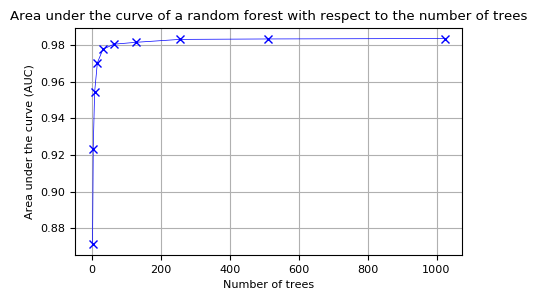

In [336]:
plt.plot(trees,AUC_random_forest,'-bx')
plt.xlabel("Number of trees")
plt.ylabel("Area under the curve (AUC)")
plt.title("Area under the curve of a random forest with respect to the number of trees")
plt.grid()

We can notice that the area under the curve increases as the number of trees is bigger. 

In [276]:
def TPR(confusion):
    return confusion[1][1]/(confusion[1][1]+confusion[1][0])
    
def FPR(confusion):    
    return confusion[0][1]/(confusion[0][1]+confusion[0][0])

## A regression benchmark (1 point)
Consider the liver-disorder dataset (http://www.openml.org/d/8). The goal is to predict how much alcohol someone consumed based on blood test values.

- Take a selection of the algorithms that we covered in class that can do regression.
- Based on what you learned in the previous exercises, make educated guesses about good hyperparameter values and set up a grid or random search.
- Evaluate all models with 10-fold cross-validation and root mean squared error (RMSE). Report all results. Which model yields the best results?

In [10]:
liver = oml.datasets.get_dataset(8) # Download Liver-disorders data
X, y = liver.get_data(target=liver.default_target_attribute);